In [1]:
import os, sys
import torch
root_dir = '../'
sys.path.append(root_dir)
from config import config
from model.train import load_eval
from model import datasets, utils
import matplotlib.pyplot as plt
from model.utils import compute_rdf

In [2]:
dir_paths = os.path.join(root_dir, 'output')

dir_paths = os.listdir(dir_paths)
dir_path = dir_paths[-1]

print(dir_path)

20250304_232443_N432_n432_k5_d3


In [10]:
dir_path = os.path.join(root_dir, 'output', dir_path)
path_param = '../config/params3d.yml'
cfg = config.load_config(path_param)
cfg.data.data_dir = '../md/data4/700K'
config.check_data_config(cfg)
config.check_device_config(cfg)
dataset = datasets.get_dataset(cfg)

mean_true = dataset.mean
std_true = dataset.std
x_true4 = dataset.x_sam

# eval_path = os.path.join(dir_path, 'eval/eval.pth')
# eval = torch.load(eval_path)
# x_pred = eval['x_pred']


In [12]:
dir_path = os.path.join(root_dir, 'output', dir_path)
path_param = '../config/params3d.yml'
cfg = config.load_config(path_param)
cfg.data.data_dir = '../md/data6/700K'
config.check_data_config(cfg)
config.check_device_config(cfg)
dataset = datasets.get_dataset(cfg)

mean_true6 = dataset.mean
std_true6 = dataset.std
x_true6 = dataset.x_sam

(0.0, 8.59347792489)

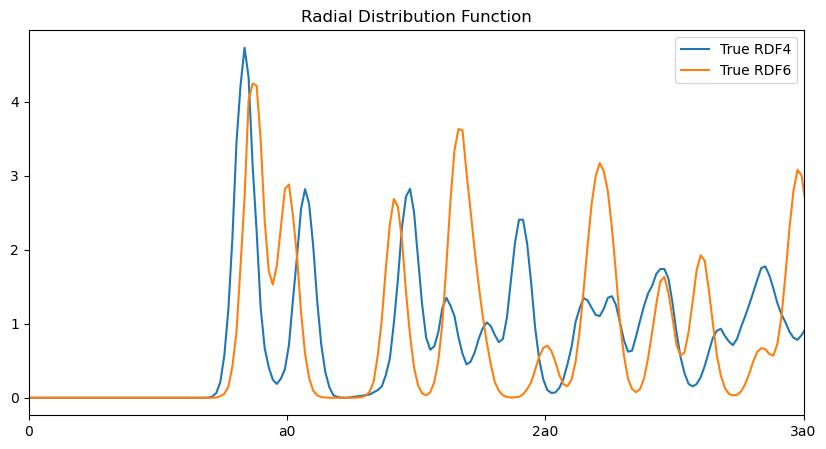

In [16]:
a0 = 2.86449264163000

fig, ax = plt.subplots(figsize=(10, 5))

# r_values, g_r = compute_rdf(x_pred, 6*a0, 6*a0, 0.5*a0, a0/64)
# ax.plot(r_values.cpu(), g_r.cpu(), label='Predicted RDF')
 
r_values_true4, g_r_true4 = compute_rdf(x_true4, 4*a0, 4*a0, 0.5*a0, a0/64)
ax.plot(r_values_true4.cpu(), g_r_true4.cpu(), label='True RDF4')

r_values_true6, g_r_true6 = compute_rdf(x_true6, 6*a0, 6*a0, 0.5*a0, a0/64)
ax.plot(r_values_true6.cpu(), g_r_true6.cpu(), label='True RDF6')

ax.set_title('Radial Distribution Function')

xticks = [0*a0, 1*a0, 2*a0, 3*a0, 4*a0, 5*a0, 6*a0]
xtick_labels = ['0', 'a0', '2a0', '3a0', '4a0', '5a0', '6a0']
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.legend()
ax.set_xlim(0.*a0, 3*a0)

